In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# First run the raw_data_to_csv.py script
%run raw_data_to_csv.py

# Load the analysis data
loan_analysis = pd.read_csv('loan_analysis_combined.csv')
ownership_analysis = pd.read_csv('ownership_analysis_combined.csv')

# Display the data
print("Loan Analysis Data:")
print(loan_analysis)
print("\nOwnership Analysis Data:")
print(ownership_analysis)


Loan Analysis Data:
           loan_type  default_rate  avg_interest_rate  avg_loan_amount  \
0          EDUCATION          10.1             14.220         1000.000   
1            MEDICAL          15.2              0.000        25500.000   
2            VENTURE          20.0              0.000        17086.000   
3    HOMEIMPROVEMENT           8.5              9.990          331.795   
4  DEBTCONSOLIDATION          12.0             12.495           50.000   
5           PERSONAL          10.5              9.490         2000.000   

   risk_score  
0    0.335240  
1    0.319700  
2    0.371258  
3    0.256875  
4    0.342090  
5    0.287880  

Ownership Analysis Data:
  ownership_type  stability_score  default_rate  risk_score
0           RENT             60.0           5.0        0.44
1       MORTGAGE             75.0           3.5        0.29
2            OWN             85.0           2.0        0.17


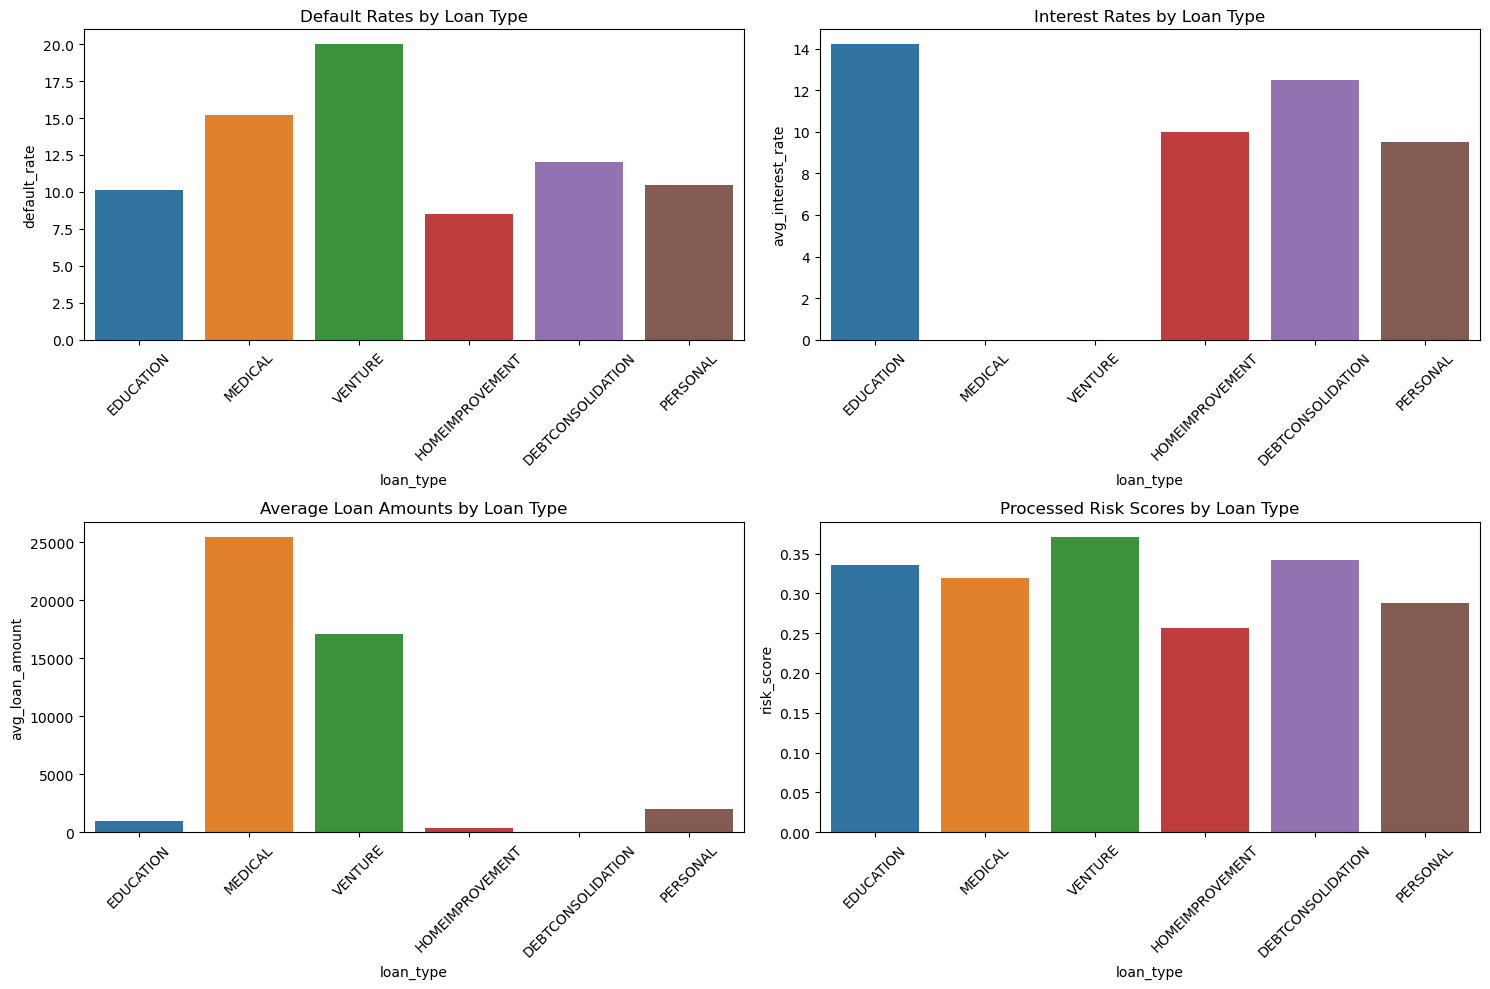

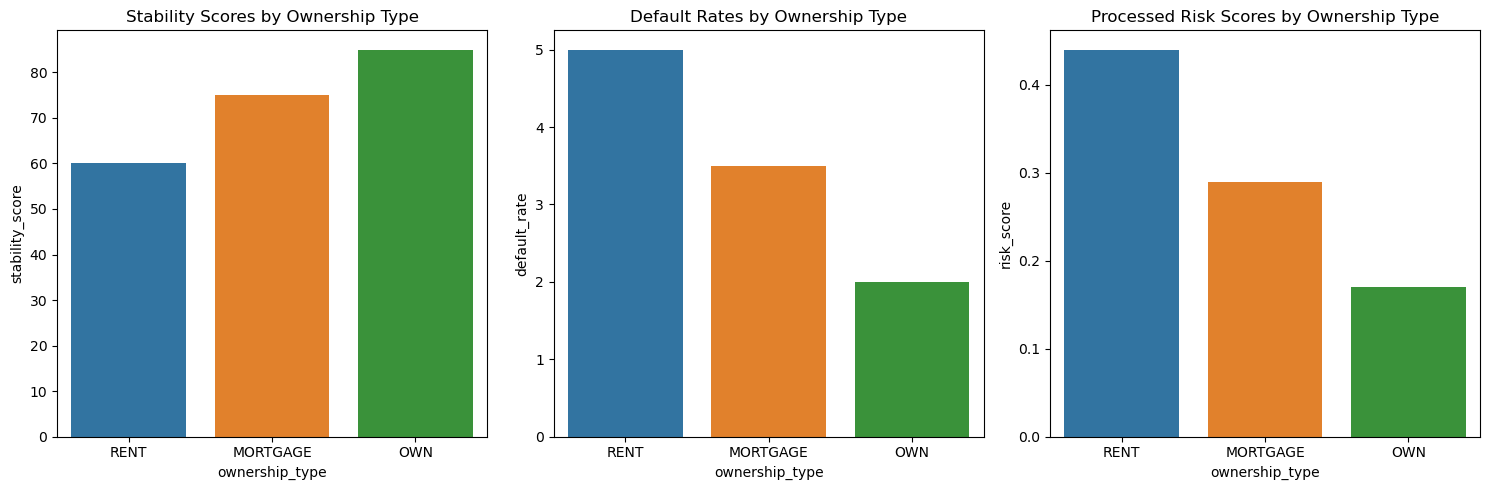

In [2]:
# Loan Data Analysis
plt.figure(figsize=(15, 10))

# Plot 1: Default Rates by Loan Type
plt.subplot(2, 2, 1)
sns.barplot(data=loan_analysis, x='loan_type', y='default_rate')
plt.title('Default Rates by Loan Type')
plt.xticks(rotation=45)

# Plot 2: Interest Rates by Loan Type
plt.subplot(2, 2, 2)
sns.barplot(data=loan_analysis, x='loan_type', y='avg_interest_rate')
plt.title('Interest Rates by Loan Type')
plt.xticks(rotation=45)

# Plot 3: Average Loan Amounts by Loan Type
plt.subplot(2, 2, 3)
sns.barplot(data=loan_analysis, x='loan_type', y='avg_loan_amount')
plt.title('Average Loan Amounts by Loan Type')
plt.xticks(rotation=45)

# Plot 4: Final Risk Scores by Loan Type
plt.subplot(2, 2, 4)
sns.barplot(data=loan_analysis, x='loan_type', y='risk_score')
plt.title('Processed Risk Scores by Loan Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Home Ownership Analysis
plt.figure(figsize=(15, 5))

# Plot 1: Stability Scores by Ownership Type
plt.subplot(1, 3, 1)
sns.barplot(data=ownership_analysis, x='ownership_type', y='stability_score')
plt.title('Stability Scores by Ownership Type')

# Plot 2: Default Rates by Ownership Type
plt.subplot(1, 3, 2)
sns.barplot(data=ownership_analysis, x='ownership_type', y='default_rate')
plt.title('Default Rates by Ownership Type')

# Plot 3: Final Risk Scores by Ownership Type
plt.subplot(1, 3, 3)
sns.barplot(data=ownership_analysis, x='ownership_type', y='risk_score')
plt.title('Processed Risk Scores by Ownership Type')

plt.tight_layout()
plt.show()


In [3]:
# Function to calculate loan risk score
def calculate_loan_risk(row):
    default_component = min(row['default_rate'] / 25, 1) * 0.4
    interest_component = min(row['avg_interest_rate'] / 25, 1) * 0.3
    amount_component = min(row['avg_loan_amount'] / 100000, 1) * 0.3
    return default_component + interest_component + amount_component

# Function to calculate ownership risk score
def calculate_ownership_risk(row):
    stability_component = (100 - row['stability_score']) / 100 * 0.6
    default_component = min(row['default_rate'] / 10, 1) * 0.4
    return stability_component + default_component

# Calculate components for loan risk
loan_analysis['default_component'] = loan_analysis['default_rate'].apply(lambda x: min(x / 25, 1) * 0.4)
loan_analysis['interest_component'] = loan_analysis['avg_interest_rate'].apply(lambda x: min(x / 25, 1) * 0.3)
loan_analysis['amount_component'] = loan_analysis['avg_loan_amount'].apply(lambda x: min(x / 100000, 1) * 0.3)
loan_analysis['calculated_risk'] = loan_analysis.apply(calculate_loan_risk, axis=1)

# Calculate components for ownership risk
ownership_analysis['stability_component'] = ownership_analysis['stability_score'].apply(lambda x: (100 - x) / 100 * 0.6)
ownership_analysis['default_component'] = ownership_analysis['default_rate'].apply(lambda x: min(x / 10, 1) * 0.4)
ownership_analysis['calculated_risk'] = ownership_analysis.apply(calculate_ownership_risk, axis=1)

# Display component breakdown
print("Loan Risk Score Components:")
print(loan_analysis[['loan_type', 'default_component', 'interest_component', 'amount_component', 'calculated_risk', 'risk_score']])

print("\nOwnership Risk Score Components:")
print(ownership_analysis[['ownership_type', 'stability_component', 'default_component', 'calculated_risk', 'risk_score']])


Loan Risk Score Components:
           loan_type  default_component  interest_component  amount_component  \
0          EDUCATION             0.1616             0.17064          0.003000   
1            MEDICAL             0.2432             0.00000          0.076500   
2            VENTURE             0.3200             0.00000          0.051258   
3    HOMEIMPROVEMENT             0.1360             0.11988          0.000995   
4  DEBTCONSOLIDATION             0.1920             0.14994          0.000150   
5           PERSONAL             0.1680             0.11388          0.006000   

   calculated_risk  risk_score  
0         0.335240    0.335240  
1         0.319700    0.319700  
2         0.371258    0.371258  
3         0.256875    0.256875  
4         0.342090    0.342090  
5         0.287880    0.287880  

Ownership Risk Score Components:
  ownership_type  stability_component  default_component  calculated_risk  \
0           RENT                 0.24               0.20      